In [20]:
import sklearn
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score

In [6]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')

In [9]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [13]:
X,y=mnist['data'],mnist['target']

In [11]:
X.shape

(70000, 784)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split (X,y,stratify=y,shuffle =True, random_state=144)

In [15]:
X_train.shape 

(52500, 784)

In [16]:
y_train.shape

(52500,)

In [17]:
X_test.shape

(17500, 784)

In [18]:
y_test.shape

(17500,)

In [27]:
import matplotlib 
import matplotlib.pyplot as plt
some_digit=x[25000]
some_digit_image=some_digit.reshape(28,28)
plt.show(some_digit_image, cmap=matplotlib.cm.binary)

TypeError: show() got an unexpected keyword argument 'cmap'

In [30]:
from sklearn.ensemble import RandomForestClassifier 

C:\Users\amit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [37]:
rf=RandomForestClassifier(n_jobs=-1,n_estimators=100)

In [45]:
rf=rf.fit(X_train,y_train)

In [41]:
rf.score(X_test,y_test)

0.9666285714285714

In [40]:
predict_rf=rf.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,predict_rf)
print('now the score of confusion metrics  \n{}'.format(confusion))

now the score of confusion metrics  
[[1705    1    2    1    0    4    3    0   10    0]
 [   0 1942    6    4    2    2    3    4    3    3]
 [   6    1 1699   10   10    0    3    9    9    1]
 [   5    2   23 1687    1   18    2   20   17   10]
 [   0    2    4    1 1659    0   10    4    4   22]
 [   5    1    2   19    1 1514   13    2   13    8]
 [   9    3    2    0    1   13 1686    0    5    0]
 [   1   10   17    2    7    2    0 1762    2   20]
 [   1    6   12   20    8    9   10    2 1623   15]
 [   5    5    9   16   22    7    1   20   16 1639]]


In [9]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_logreg)

0.9673913043478262

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_logreg,target_names=['melignon','benign']))

             precision    recall  f1-score   support

   melignon       0.98      0.91      0.94        53
     benign       0.95      0.99      0.97        90

avg / total       0.96      0.96      0.96       143



In [20]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,logreg.decision_function(X_test))

In [16]:
threshold 

array([ 10.27905708,   2.48592051,   2.29935121,   1.5145878 ,
         1.41808957,   1.25809581,   0.77894459,   0.53011935,
        -2.44861036,  -2.60531374, -48.82522166])

In [18]:
np.argmin(np.abs(threshold))

7

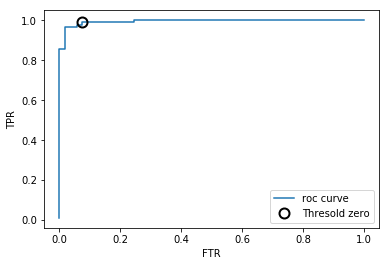

In [27]:
plt.plot(fpr,tpr,label='roc curve')
plt.xlabel('FTR')
plt.ylabel('TPR')
nearest_to_zero=np.argmin(np.abs(threshold))
plt.plot(fpr[nearest_to_zero],tpr[nearest_to_zero],'o',markersize=10,label='Thresold zero',fillstyle='none',c='k',mew=2)
plt.legend(loc=4)

In [29]:
from sklearn.metrics import roc_auc_score
log_reg_score=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print('aucsd for logging:{:.3f}'.format(log_reg_score))

aucsd for logging:0.994
